# Approach

        Followed the Cross-Industry Standard Process for Data Mining (CRISP-DM) methodology to achieve the goal.

                Step 1. Understandning of Problem Statement

                Step 2. Understanding the Data

                Step 3. Perform Data Preparation

                Step 4. Model Selection and Training

                Step 5. Evaluation 

                Step 6. Forming relation between the model performance and data or problem statement or business Understanding

# Step 1. Understanding of Problem Statement

    Given the details about the car insurance claim, predicting the claim amount per year as well per policy

In [2]:
!pip3.9 install pandas arff matplotlib seaborn numpy scikit-learn joblib pycaret


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import arff
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import  StandardScaler
from scipy.stats import f_oneway
import  joblib

# Step 2. Understanding the Data
    Exploratory Data Analysis (EDA) 

In [3]:
data_freq = arff.load('freMTPL2freq.arff')
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower", 
"VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])
data_sev = arff.load('freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

In [4]:
df_freq.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'


In [5]:
cols = ['Area', "VehBrand", "Region"]

for col in cols:
    df_freq[col] = df_freq[col].str.strip("'")

In [6]:
df_freq.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72


In [7]:
df_sev.head()

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00


In [8]:
print("Shape of the df_freq is {0}".format(df_freq.shape))
print("Shape of the df_freq is {0}".format(df_sev.shape))

Shape of the df_freq is (678013, 12)
Shape of the df_freq is (26639, 2)


In [9]:
# Get to know data type of both dataframe
df_freq.dtypes

IDpol         float64
ClaimNb       float64
Exposure      float64
Area           object
VehPower      float64
VehAge        float64
DrivAge       float64
BonusMalus    float64
VehBrand       object
VehGas         object
Density       float64
Region         object
dtype: object

In [10]:
df_sev.dtypes

IDpol          float64
ClaimAmount    float64
dtype: object

In [11]:
# check if there any null values in dataframe 
df_freq.isnull().sum()

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

In [12]:
df_sev.isnull().sum()

IDpol          0
ClaimAmount    0
dtype: int64

# NOTE:

The main the target column is the "ClaimAmount", So at first place we need to consider the records from "df_freq" for which we have "ClaimAmount".

In [13]:
# Merge the two dataframe based on IDpol using inner joint
merged_df = pd.merge(df_freq, df_sev, on='IDpol', how='left')

In [14]:
merged_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount
count,6.795130e+05,679513.000000,679513.000000,679513.000000,679513.000000,679513.000000,679513.000000,679513.000000,2.644400e+04
mean,2.621743e+06,0.058554,0.529078,6.454486,7.043808,45.497617,59.784621,1794.052255,2.265513e+03
std,1.641757e+06,0.279196,0.364378,2.050990,5.664855,14.140106,15.666953,3960.829098,2.937103e+04
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,1.000000e+00
25%,1.157893e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,6.859925e+02
50%,2.272111e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,1.172000e+03
75%,4.046210e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,1.212385e+03
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06


In [15]:
merged_df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,NaN
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,NaN
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22,NaN
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,NaN
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,NaN


In [16]:
merged_df["ClaimAmount"].fillna(0, inplace=True)

C:\Users\ganes\AppData\Local\Temp\ipykernel_18788\564634801.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


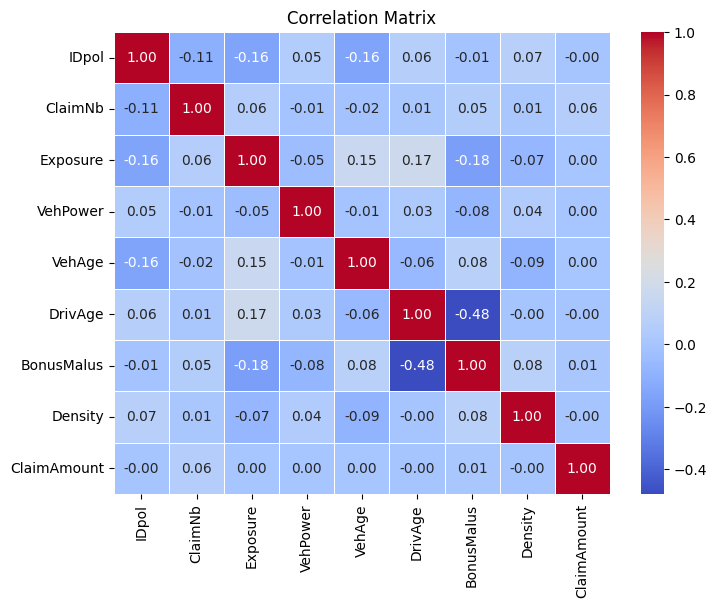

In [17]:
# let's see how the variables are correlated
corr = merged_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
def cat_num_correlation( cat_col):

    print("******************* Test started ********************")
    f_statistic, p_value = f_oneway(*[merged_df[merged_df[cat_col] == c]['ClaimAmount'] for c in merged_df[cat_col].unique()])

    # Interpret ANOVA results
    print(f"ANOVA results: {cat_col} and ClaimAmount")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

    # Perform post-hoc (FDR correction) test if ANOVA indicates significant differences
    if p_value < 0.05:
        print("\nThere are significant differences between groups.")
    else:
        print("there is no significant relation between the groups")
    
    print("******************* Test completed ********************")
    print("                  ") 
    return None

In [535]:
# is there significant differences between ClaimAmount and VehBrand ?
cat_num_correlation("VehBrand")
cat_num_correlation("Area")
cat_num_correlation("VehGas")
cat_num_correlation("Region")

******************* Test started ********************
ANOVA results: VehBrand and ClaimAmount
F-statistic: 0.46030074734411147
p-value: 0.9160560873557445
there is no significant relation between the groups
******************* Test completed ********************
                  
******************* Test started ********************
ANOVA results: Area and ClaimAmount
F-statistic: 0.9423234544771284
p-value: 0.4520978138080888
there is no significant relation between the groups
******************* Test completed ********************
                  
******************* Test started ********************
ANOVA results: VehGas and ClaimAmount
F-statistic: 1.4512795716075375
p-value: 0.2283335275932197
there is no significant relation between the groups
******************* Test completed ********************
                  
******************* Test started ********************
ANOVA results: Region and ClaimAmount
F-statistic: 0.4222143356967712
p-value: 0.9902135651489434
there is n

# Looking at the Correlation matrix and Scatter Plot

        1. Most of the feature has negative or low correlation with target column

        2. It can be agained confirmed from visual representation of the data from above scatter plot of merged dataframe

        3. ANOVA (Analysis of Variance) test show that all the categorical columns has no significant relation with target column 

In [18]:
duplicated_counts = merged_df["IDpol"].duplicated().value_counts()
print(duplicated_counts)

False    678013
True       1500
Name: IDpol, dtype: int64


In [537]:
cmap = plt.get_cmap('tab10')  # You can replace 'tab10' with any other colormap name

# Generate colors from the chosen colormap
colors = [cmap(i) for i in np.linspace(0, 1, 2)]

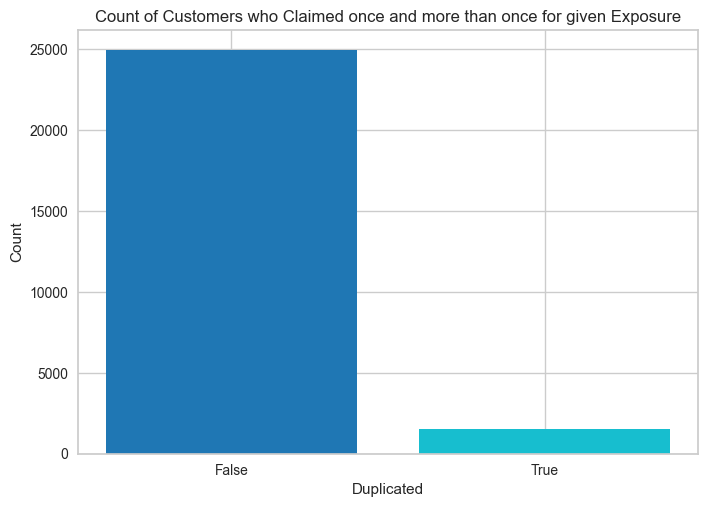

False    24944
True      1500
Name: IDpol, dtype: int64


In [538]:
# Plotting
plt.bar(duplicated_counts.index.astype(str), duplicated_counts.values, color=colors)
plt.xlabel('Duplicated')
plt.ylabel('Count')
plt.title('Count of Customers who Claimed once and more than once for given Exposure')
plt.show()
print(duplicated_counts)

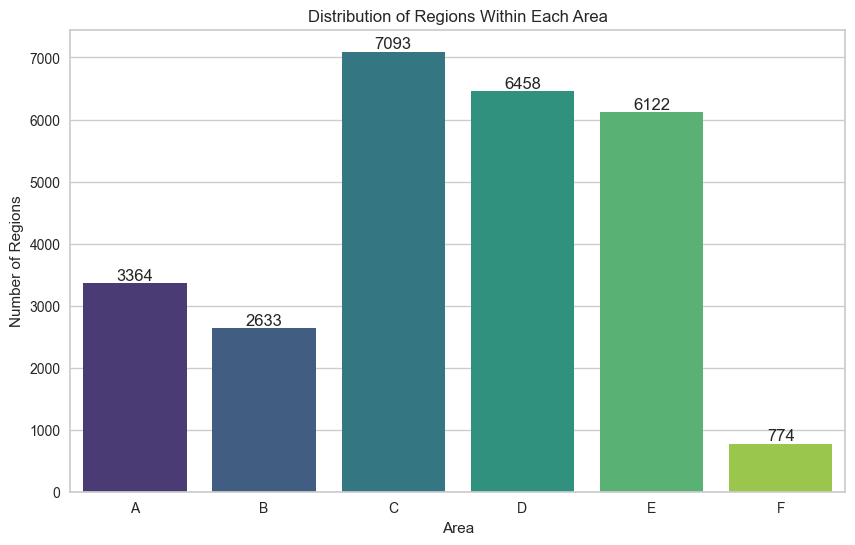

In [539]:
# Plot the distribution of regions within each area using a bar plot
area_counts_region = merged_df.groupby('Area')['Region'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=area_counts_region, x='Area', y='Region', palette='viridis')

# Adding numbers on top of the bars
for i, region_count in enumerate(area_counts_region["Region"]):
    plt.text(i, region_count, str(region_count), ha='center', va='bottom')

plt.title('Distribution of Regions Within Each Area')
plt.xlabel('Area')
plt.ylabel('Number of Regions')
plt.show()

# Now we know there are customers who has claimed  more than once during given time of exposure. So the claimed amount for same customer can is added to make further process easy.


In [19]:
# Sum ClaimAmount, specially good when customer has Claimed more than once. Get unique records with total claimamount
claimedamount_sum_df = pd.DataFrame(merged_df.groupby('IDpol')['ClaimAmount'].sum())

In [20]:
claimedamount_sum_df.reset_index()

,IDpol,ClaimAmount
0,1.0,0.0
1,3.0,0.0
2,5.0,0.0
3,10.0,0.0
4,11.0,0.0
...,...,...
678008,6114326.0,0.0
678009,6114327.0,0.0
678010,6114328.0,0.0
678011,6114329.0,0.0


In [21]:
# drop ClaimAmount from the merged_df
df = merged_df.drop(axis=1, columns="ClaimAmount")

In [22]:
# Again remove customer who has claimed more than once
df_unique = df.drop_duplicates(subset='IDpol', keep='first')


In [23]:
print("The modified claimed amount dataframe has {0} records and main dataframe (df_unique) has {1} records".format(claimedamount_sum_df.shape, df_unique.shape))

The modified claimed amount dataframe has (678013, 1) records and main dataframe (df_unique) has (678013, 12) records


In [24]:
# dataframe with all unique records
df_train = pd.merge(df_unique, claimedamount_sum_df, on='IDpol')

In [25]:
df_train.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22,0.0
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0


In [552]:
# Get information about the rlation between the categorical cols "Area and Region"

contingency_table = pd.crosstab(df_train['Area'], df_train['Region'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)


# Set the significance level (alpha)
alpha = 0.05

# Perform hypothesis test
if p < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant relationship between Area and Region.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant relationship between Area and Region.")


Chi-square statistic: 13700.230260906466
p-value: 0.0
Reject the null hypothesis.
There is a significant relationship between Area and Region.


In [26]:
# Due to high correlation between Area and it's Region, Combined the columns and create a new feature
df_train["Area_Region"] = df_train["Area"].astype(str) + "_" + df_train["Region"].astype(str)

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
# create object for label encoder
ordinal_encoder = OrdinalEncoder()
ont_hot_enc = OneHotEncoder()


In [35]:


# Fit and transform the "Area_Region" column
area_region_encoded = ont_hot_enc.fit_transform(df_train[["Area_Region"]])

# Convert the encoded data into a DataFrame and concatenate it with the original DataFrame
df_encoded = pd.concat([df_train, pd.DataFrame(area_region_encoded.toarray(), columns=ont_hot_enc.get_feature_names_out(["Area_Region"]))], axis=1)

# Drop the original "Area_Region" column if needed
# df_encoded.drop("Area_Region", axis=1, inplace=True)


In [37]:
veh_gas_encoded = ont_hot_enc.fit_transform(df_train[["VehGas"]])

# Convert the encoded data into a DataFrame and concatenate it with the original DataFrame
df_encoded = pd.concat([df_train, pd.DataFrame(veh_gas_encoded.toarray(), columns=ont_hot_enc.get_feature_names_out(["VehGas"]))], axis=1)


In [38]:
# feature engineering for density column consideirng areas with low, medium and high density
def map_density_to_category(density):
    if density <= 111:
        return 'Low'
    elif density <= 500:
        return 'Medium'
    else:
        return 'High'
    
df_train['Density_Category'] = df_train['Density'].apply(map_density_to_category)

In [39]:
# map new Density_Category col to numerical format 
df_train["Density_Category_encoded"] = df_train["Density_Category"].map({"Low" : 0, "Medium" : 1, "High": 2})

In [40]:
# processing of VehBrand
print("Customers using {0} different vehicle brands applied for claim:".format(df_train["VehBrand"].nunique()), df_train["VehBrand"].unique().tolist())

Customers using 11 different vehicle brands applied for claim: ['B12', 'B6', 'B3', 'B2', 'B5', 'B10', 'B14', 'B13', 'B4', 'B1', 'B11']


In [41]:

veh_gas_encoded = ont_hot_enc.fit_transform(df_train[["VehBrand"]])

# Convert the encoded data into a DataFrame and concatenate it with the original DataFrame
df_encoded = pd.concat([df_train, pd.DataFrame(veh_gas_encoded.toarray(), columns=ont_hot_enc.get_feature_names_out(["VehBrand"]))], axis=1)


In [43]:
df_encoded.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,...,VehBrand_B10,VehBrand_B11,VehBrand_B12,VehBrand_B13,VehBrand_B14,VehBrand_B2,VehBrand_B3,VehBrand_B4,VehBrand_B5,VehBrand_B6
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 3. Perform Data Preparation
    1. Perform feature engineering

    2. Data Normalization


In [44]:
df_train = df_encoded

In [45]:
# calculate in the exposure in months
df_train["Exposure_months"] = df_train["Exposure"] * 12

In [46]:
# calculate  ClaimAmount per month
df_train["ClaimAmount_Per_month"] = df_train["ClaimAmount"] / df_train["Exposure_months"]

In [47]:
# calculate the ClaimAmount for each month and per unit claim
df_train["ClaimAmount_Per_month_per_claim"] = df_train["ClaimAmount_Per_month"] / df_train["ClaimNb"]

In [48]:
df_train.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,...,VehBrand_B13,VehBrand_B14,VehBrand_B2,VehBrand_B3,VehBrand_B4,VehBrand_B5,VehBrand_B6,Exposure_months,ClaimAmount_Per_month,ClaimAmount_Per_month_per_claim
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.20,0.0,0.0
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.24,0.0,0.0
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.00,0.0,0.0
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.08,0.0,0.0
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.08,0.0,0.0


In [49]:
df_final = df_train.drop(["ClaimNb", "Exposure", "Area", "Region", "ClaimAmount", "Exposure_months", "ClaimAmount_Per_month", "Density","VehGas", "Density_Category", "VehBrand", "Area_Region"], axis=1)

In [50]:
df_final.head()

,IDpol,VehPower,VehAge,DrivAge,BonusMalus,Density_Category_encoded,VehBrand_B1,VehBrand_B10,VehBrand_B11,VehBrand_B12,VehBrand_B13,VehBrand_B14,VehBrand_B2,VehBrand_B3,VehBrand_B4,VehBrand_B5,VehBrand_B6,ClaimAmount_Per_month_per_claim
0,1.0,5.0,0.0,55.0,50.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,5.0,0.0,55.0,50.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,6.0,2.0,52.0,50.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,7.0,0.0,46.0,50.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.0,7.0,0.0,46.0,50.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Descriptive Statistics:
              IDpol      VehPower        VehAge       DrivAge    BonusMalus  \
count  2.494400e+04  24944.000000  24944.000000  24944.000000  24944.000000   
mean   2.262558e+06      6.468970      7.386225     45.139793     64.930164   
std    1.578475e+06      2.012848      5.173621     14.658487     19.864719   
min    1.390000e+02      4.000000      0.000000     18.000000     50.000000   
25%    1.082690e+06      5.000000      3.000000     34.000000     50.000000   
50%    2.130098e+06      6.000000      7.000000     45.000000     55.000000   
75%    3.178542e+06      7.000000     11.000000     54.000000     76.000000   
max    6.113971e+06     15.000000     99.000000     99.000000    228.000000   

       Area_Region_encoded  VehGas_mapped  Density_Category_encoded  \
count         24944.000000   24944.000000              24944.000000   
mean             63.455741       0.509140                  1.248918   
std              31.082649       0.499926          

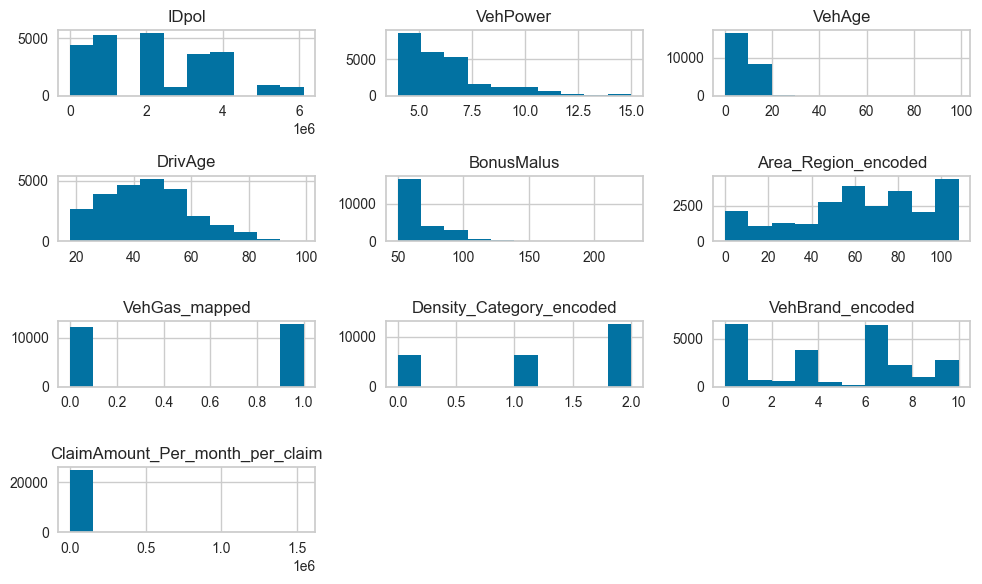

In [571]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace df with your actual DataFrame

# Descriptive statistics
print("Descriptive Statistics:")
print(df_final.describe())

# Histogram for each numerical column
print("\nHistograms:")
df_final.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [51]:
# Prepare the training data
X = df_final.drop("ClaimAmount_Per_month_per_claim", axis =1)
Y = df_final["ClaimAmount_Per_month_per_claim"]

In [52]:
# drop IDpol
x = X.drop("IDpol", axis=1)

In [58]:
Y.fillna(0, inplace=True)

count    6.780130e+05
mean     2.992632e+01
std      3.011586e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.543712e+06
Name: ClaimAmount_Per_month_per_claim, dtype: float64

# Data Transformation

In [60]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(x)

# Step 4-5 Model Selection and Training as well as Evaluation 

In [61]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model_ln = LinearRegression()

# Training the model
model_ln.fit(X_train, y_train)

y_pred = model_ln.predict(X_test)

# Calculate MSE, MAE and R2
mse = mean_squared_error(y_test, y_pred)
msa = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE:", mse)
print("MAE:", msa)
print(f"R-squared:", r2)

MSE: 5431239.742642735
MAE: 60.16089834923523
R-squared: 0.00013865792347056427


In [62]:
# Initialize the Random Forest regressor model
model_en = RandomForestRegressor(n_estimators=10, random_state=42)

# Training the model
model_en.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model_en.predict(X_test)


# Calculate MSE, MAE and R2
mse = mean_squared_error(y_test, y_pred)
msa = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE:", mse)
print("MAE:", msa)
print(f"R-squared:", r2)

MSE: 11706383.904632157
MAE: 71.14556265481492
R-squared: -1.1550808427494097


In [ ]:
# Defining a dictionary to store the results
results = {}

# List of kernels to evaluate
kernels = ['linear']

# Loop through each kernel and train/evaluate the model
for kernel in kernels:
    # Create SVR model with specified kernel
    model_svr = SVR(kernel=kernel)

    # Train the SVR model
    model_svr.fit(X_train, y_train)

    # Make predictions
    y_pred = model_svr.predict(X_test)

    # Calculate MSE, MAE and R2
    mse = mean_squared_error(y_test, y_pred)
    msa = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[kernel] = {'MSE': mse, 'R2': r2, "MAE": msa}

In [584]:
print("Results for SVM Regression with different kernels:")

for kernel, result in results.items():
    print("  ")
    print(f"Kernel: {kernel}")
    print(f"MSE: {result['MSE']}")
    print(f"MAE: {result['MAE']}")
    print(f"R-squared: {result['R2']}")
    print("   ")
    print("********************************")

Results for SVM Regression with different kernels:
  
Kernel: linear
MSE: 52103669.37320302
MAE: 623.5852662181164
R-squared: -0.006247498193222789
   
********************************
  
Kernel: poly
MSE: 52104924.429694526
MAE: 623.581797845006
R-squared: -0.006271736360512481
   
********************************
  
Kernel: rbf
MSE: 52102376.704755045
MAE: 622.6702923972911
R-squared: -0.006222533648356565
   
********************************


# Step 6. Forming relation between the model performance and data or problem statement or business Understanding

# What is our model?

        1. Model has been trained to predict the ClaimAMount per Month per ClaimNB. 

        2. When we have to predict the Claim for any cutomer for a year ------>>>> ClaimAmount/Month * 12 months


# Decision about choosing the parameter or metric for model evaluation (MAE)

        We're considering using Mean Absolute Error (MAE), which tells us, on average, how far off our model's predictions are from the actual values. Since we're dealing with predicting prices or amounts, MAE gives us a clear idea of the model's error.

# Now, why are we considering Support Vector Machine (SVM) as our algorithm? 

        Well, at the beginning of our analysis, we checked the correlation between variables and found that they're not strongly related to the ClaimAmount. Additionally, these variables seem to have a non-linear relationship with the ClaimAmount. In such cases, we need an algorithm like SVM that can capture this non-linear behavior in the data.

# How model can be further optimized ?

    1. Cross Validation for better generalization of model

    2. SVM for regression: parameter tunning C , gamma, degree


# Additional implementation: Pycaret

        Low code machine learning library Pycaret, simplifys the process of the machine learning model training as well as evaluation by automatically performing various machine learning tasks such as data preprocessing, feature engineering, model selection, hyperparameter tuning, model evaluation.

In [4]:
from pycaret.regression import *


In [593]:
s = setup(data = df_final, target = 'ClaimAmount_Per_month_per_claim', session_id=123)

,Description,Value
0,Session id,123
1,Target,ClaimAmount_Per_month_per_claim
2,Target type,Regression
3,Original data shape,"(24944, 10)"
4,Transformed data shape,"(24944, 10)"
5,Transformed train set shape,"(17460, 10)"
6,Transformed test set shape,"(7484, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [594]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,1154.9033,204622940.4000,10331.4652,-0.0020,2.2053,18.2611,0.0170
br,Bayesian Ridge,1155.0625,204595422.2000,10331.7540,-0.0023,2.2024,18.3565,0.0370
omp,Orthogonal Matching Pursuit,1155.6376,204657327.7000,10332.6037,-0.0023,2.2070,18.4276,0.0360
en,Elastic Net,1185.9487,204580531.7000,10335.1105,-0.0046,2.1712,17.5873,0.0870
lr,Linear Regression,1189.1711,204609896.5000,10336.7354,-0.0052,2.1734,17.6238,2.1230
lasso,Lasso Regression,1188.9171,204608755.8000,10336.6645,-0.0052,2.1731,17.6235,0.0920
ridge,Ridge Regression,1189.1686,204609880.8000,10336.7342,-0.0052,2.1734,17.6238,0.0350
lar,Least Angle Regression,1189.1807,204609952.0000,10336.7408,-0.0052,2.1734,17.6238,0.0390
llar,Lasso Least Angle Regression,1188.9171,204608756.2000,10336.6646,-0.0052,2.1731,17.6235,0.0300
huber,Huber Regressor,748.3259,205109384.1955,10356.7176,-0.0107,2.0089,1.9647,0.0580


From above models only Huber Regressor has minimum MAE compare to other models, but SVM is better than the Huber Regressor. As mentioned above it can be further imporved via tuning hyperparameters.

# Thank you very much for giving me the opportunity to demonstrate my practical skills.


